<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 8: Implementasi Hill Climbing dan Simulated Annealing</h3>
</div>

### Tujuan Praktikum
- Mahasiswa memahami dan mampu mengimplementasikan algoritma Hill Climbing pada python
- Mahasiswa memahami dan mampu mengimplementasikan algoritma Simulated Annealing pada python

**Jangan lupa untuk selalu import *library* Random ketika memulai sesi baru (*run time*) atau kode Python yang memerlukan penggunaan library Random** 

In [1]:
# import random
import random # library ini akan digunakan untuk melakukan inisiasi solusi awal secara random
import pandas as pd

def printJadwal(solusi): 
    print(pd.DataFrame.from_dict(solusi, orient='index', columns=['Ruangan', 'Waktu']))

## Hill Climbing

### Soal 1

SMA RezaSangar memiliki 9 mata pelajaran yang harus dijadwalkan untuk satu semester. Terdapat 3 ruang kelas yang tersedia dan setiap mata pelajaran harus dijadwalkan pada salah satu dari 4 waktu yang tersedia dalam seminggu. 

**Syarat:**
- Tidak boleh ada dua mata pelajaran yang dijadwalkan pada waktu yang sama.
- Setiap mata pelajaran harus dijadwalkan tepat pada satu waktu dan satu ruang

**Final State:**
- Seluruh mata pelajaran telah dijadwalkan ke dalam ruangan dan waktu yang tersedia tanpa adanya bentrok

**Data mata pelajaran, ruang kelas, dan waktu yang tersedia**
|Mata Pelajaran|Ruang Kelas|Waktu|
|---|---|---|
|Ekonomi|Ruang 101|Senin 08:00|
|Geologi|Ruang 102|Senin 10:00|
|Sejarah|Ruang 103|Selasa 08:00|
|Fisika||Rabu 08:00|
|Biologi|||
|Kimia|||
|Matematika|||
|Bahasa Indonesia|||
|Bahasa Inggris|||

#### 1. Buat fungsi untuk mencari solusi awal (Bobot nilai: `15`)

Hint: Solusi yang akan terbentuk adalah sebuah dictionary dengan `key berupa nama mata pelajaran` dan `value berupa tupple` ruang kelas dan waktu yang tersedia

**Pro tips:** gunakan fungsi `random.choice()` untuk memilih secara acak nilai dalam array 

In [2]:
def initiateSolusiAwal(mapel, ruangan, waktu):
    solusi = {} # Buat sebuah dictionary kosong
    for mk in mapel: # Telusuri seluruh nilai dalam array mapel!
        solusi[mk] = (random.choice(ruangan), random.choice(waktu)) 
    return solusi

#### 2. Buat fungsi untuk menghitung jumlah jadwal yang bentrok (Bobot nilai: `10`)

**Pro tips:** kita dapat melakukan eksplorasi nilai dictionary dengan menggunakan loop berikut `for key, value in dict.items():`

In [3]:
def hitungBentrok(solusi):
    jumlahBentrok = 0 # inisiasi nilai awal jumlah jadwal yang bentrok dengan nilai 0
    jadwal = {} # buat dictionary kosong untuk menampung jadwal

    for mataKuliah, (ruangan, waktu) in solusi.items(): # Telusuri seluruh nilai dalam dictionary solusi
        key = (ruangan, waktu) # Tampung tupple yang ada pada dictionary
        if key in jadwal: # Cek apakah tupple ruangan dan waktu sudah ada di jadwal atau belum
            jumlahBentrok += 1 # Lakukan increment jumlah bentrok
        else:
            jadwal[key] = mataKuliah # isi key jadwal dengan tupple ruang dan waktu, dan value jadwal dengan nama mata pelajaran
    
    return jumlahBentrok


#### 3. Buat fungsi untuk mencari tetangga (Bobot nilai: `20`)

In [4]:
def cariTetangga(solusi, arrMapel, arrRuangan, arrWaktu):
    tetangga = []  # ✅ ubah ke list
    for pelajaran in arrMapel:
        currRuangan, currWaktu = solusi[pelajaran]
        
        # Coba ganti ruangan
        for ruangan in arrRuangan:
            if ruangan != currRuangan:
                tetanggaBaru = solusi.copy()
                tetanggaBaru[pelajaran] = (ruangan, currWaktu)
                tetangga.append(tetanggaBaru)

        # Coba ganti waktu
        for waktu in arrWaktu:
            if waktu != currWaktu:
                tetanggaBaru = solusi.copy()
                tetanggaBaru[pelajaran] = (currRuangan, waktu)
                tetangga.append(tetanggaBaru)
    
    return tetangga


#### 4. Mencari solusi dengan hill climbing (Bobot nilai: `25`)

a. definisikan data berdasarkan soal yang berikan

In [5]:
mataPelajaran = [
      'Ekonomi','Geologi','Sejarah','Fisika','Biologi','Kimia',
      'Matematika','Bahasa Indonesia','Bahasa Inggris'
]    # Inisiasikan list dengan nama mata pelajaran
ruangKelas = ['Ruang 101','Ruang 102','Ruang 103'] # Inisiasikan list dengan nama ruangan
waktu = ['Senin 08:00','Senin 10:00','Selasa 08:00','Rabu 08:00'] # Inisiasikan list dengan waktu yang tersedia

b. Buat solusi awal dan hitung berapa banyak jadwal yang bentrok

In [6]:
solusi = initiateSolusiAwal(mataPelajaran,ruangKelas,waktu) # deklarasikan solusi awal dengan menggunakan fungsi initiateSolusiAwal()
jumBentrok = hitungBentrok(solusi) # Hitung jumlah jadwal bentrok dengan fungsi hitungBentrok()
iterasi = 0

print(f"Iterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi Awal:")
printJadwal(solusi)

Iterasi: 0
Jumlah Bentrok: 2
Solusi Awal:
                    Ruangan         Waktu
Ekonomi           Ruang 103  Selasa 08:00
Geologi           Ruang 103    Rabu 08:00
Sejarah           Ruang 101   Senin 08:00
Fisika            Ruang 101   Senin 10:00
Biologi           Ruang 102    Rabu 08:00
Kimia             Ruang 103    Rabu 08:00
Matematika        Ruang 101  Selasa 08:00
Bahasa Indonesia  Ruang 103    Rabu 08:00
Bahasa Inggris    Ruang 102  Selasa 08:00


**Output mungkin akan memberikan hasil yang berbeda karena dipilih secara acak**

c. Lakukan looping hingga jadwal bentrok habis atau tidak ada jumlah jadwal bentrok yang lebih baik daripada solusi saat ini

In [7]:
while True:
    tetangga = cariTetangga(solusi, mataPelajaran, ruangKelas, waktu) # cari tetangga solusi dengan menggunakan fungsi cariTetangga()

    jumlahBentrokTetangga = [] # inisiasi list kosong (seharusnya list, bukan dict)
    for solusiTetangga in tetangga: # telusuri seluruh kemungkinan tetangga yang sudah di dapatkan
        bentrokTetangga = hitungBentrok(solusiTetangga) # hitung jadwal bentrok tetangga dengan fungsi hitungBentrok()
        jumlahBentrokTetangga.append((solusiTetangga, bentrokTetangga)) # tambahkan tupple solusi dan jumlah bentrok kedalam list jumlahBentrokTetangga
    
    jumlahBentrokTetangga.sort(key=lambda x: x[1]) # melakukan sorting array berdasarkan nilai bentrok 
    bestTetangga, bestBentrok = jumlahBentrokTetangga[0] # mengambil solusi dan jumlah bentrok terbaik

    if bestBentrok <  jumBentrok: # buat pengkondisian apabila jumlah bentrok tetangga lebih kecil dari nilai jumlah bentrok saat ini
        solusi = bestTetangga # Assign nilai solusi menjadi solusi terbaik saat ini
        jumBentrok = bestBentrok # Assign nilai jumBentrok menjadi jumlah bentrok paling sedikit saat ini
        iterasi += 1 # increment iterasi
        print(f"\nIterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi:")
        printJadwal(solusi)
        print("-"*50)
        if jumBentrok == 0: # percabangan jika jumlah bentrok sudah 0
            print("Solusi terbaik ditemukan")
            break
    else:
        print("Tidak ada tetangga yang lebih baik. Algoritma berhenti.")
        break

print("\nSolusi terbaik: ")
printJadwal(solusi)
print("Jumlah jadwal bentrok: ", jumBentrok)



Iterasi: 1
Jumlah Bentrok: 1
Solusi:
                    Ruangan         Waktu
Ekonomi           Ruang 103  Selasa 08:00
Geologi           Ruang 101    Rabu 08:00
Sejarah           Ruang 101   Senin 08:00
Fisika            Ruang 101   Senin 10:00
Biologi           Ruang 102    Rabu 08:00
Kimia             Ruang 103    Rabu 08:00
Matematika        Ruang 101  Selasa 08:00
Bahasa Indonesia  Ruang 103    Rabu 08:00
Bahasa Inggris    Ruang 102  Selasa 08:00
--------------------------------------------------

Iterasi: 2
Jumlah Bentrok: 0
Solusi:
                    Ruangan         Waktu
Ekonomi           Ruang 103  Selasa 08:00
Geologi           Ruang 101    Rabu 08:00
Sejarah           Ruang 101   Senin 08:00
Fisika            Ruang 101   Senin 10:00
Biologi           Ruang 102    Rabu 08:00
Kimia             Ruang 103   Senin 08:00
Matematika        Ruang 101  Selasa 08:00
Bahasa Indonesia  Ruang 103    Rabu 08:00
Bahasa Inggris    Ruang 102  Selasa 08:00
---------------------------------

### Soal 2 (Bobot nilai `30`)

SMA RezaHaHaHa memiliki 9 mata pelajaran yang harus dijadwalkan untuk satu semester. Terdapat 3 ruang kelas yang tersedia dan setiap mata pelajaran harus dijadwalkan pada salah satu dari 4 waktu yang tersedia dalam seminggu. 

**Syarat:**
- Tidak boleh ada dua mata pelajaran yang dijadwalkan pada waktu yang sama.
- Setiap mata pelajaran harus dijadwalkan tepat pada satu waktu dan satu ruang
- ada beberapa mata pelajaran yang harus `diambil terlebih dahulu` sebelum mata pelajaran tertentu

**Final State:**
- Seluruh mata pelajaran telah dijadwalkan ke dalam ruangan dan waktu yang tersedia tanpa adanya bentrok dan sudah sesuai dengan syarat pengambilan mata pelajaran

**Data mata pelajaran, ruang kelas, dan waktu yang tersedia**
|Mata Pelajaran|Ruang Kelas|Waktu|
|---|---|---|
|Logika Matematika|Ruang 101|Senin 08:00|
|Matematika Diskrit|Ruang 102|Senin 10:00|
|Kalkulus|Ruang 103|Selasa 08:00|
|Kalkulus Lanjut||Rabu 08:00|
|Agama|||
|Pendidikan Karakter|||
|Biologi|||
|Kimia|||
|Fisika|||

**Syarat tambahan**
- Mata pelajaran `Kalkulus Lanjut` harus diambil setelah mata pelajaran `Kalkulus`
- Mata pelajaran `Matematika Diskrit` harus diambil setelah mata pelajaran `Logika Matematika`

Pro tips: ketiga fungsi sebelumnya, namun `buat ulang fungsi hitungBentrok` dan tambahkan algoritma untuk memeriksa urutan mata pelajaran

In [8]:
def hitungBentrok(solusi, urutan_mata_pelajaran):
    jumlahBentrok = 0
    jadwal = {}

    # Deteksi bentrok waktu dan ruangan
    for mataKuliah, (ruangan, waktu) in solusi.items():
        key = (ruangan, waktu)
        if key in jadwal:
            jumlahBentrok += 1  # Bentrok ruangan dan waktu
        else:
            jadwal[key] = mataKuliah

    # Deteksi bentrok urutan prasyarat
    waktu_order = {
        'Senin 08:00': 1, 'Senin 10:00': 2,
        'Selasa 08:00': 3, 'Rabu 08:00': 4
    }

    for sebelum, sesudah in urutan_mata_pelajaran:
        if waktu_order[solusi[sebelum][1]] >= waktu_order[solusi[sesudah][1]]:
            jumlahBentrok += 1  # Prasyarat dijadwalkan setelah mata kuliah yang bergantung padanya

    return jumlahBentrok


In [9]:
mataPelajaran = [
    'Logika Matematika', 'Matematika Diskrit', 'Kalkulus', 'Kalkulus Lanjut',
    'Agama', 'Pendidikan Karakter', 'Biologi', 'Kimia', 'Fisika'
]

ruangKelas = ['Ruang 101', 'Ruang 102', 'Ruang 103']

waktu = ['Senin 08:00', 'Senin 10:00', 'Selasa 08:00', 'Rabu 08:00']

urutan_mata_pelajaran = [
    ('Logika Matematika', 'Matematika Diskrit'),
    ('Kalkulus', 'Kalkulus Lanjut')
]


In [10]:
solusi = initiateSolusiAwal(mataPelajaran, ruangKelas, waktu)
jumBentrok = hitungBentrok(solusi, urutan_mata_pelajaran)
iterasi = 0

print(f"Iterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi Awal:")
printJadwal(solusi)


Iterasi: 0
Jumlah Bentrok: 3
Solusi Awal:
                       Ruangan         Waktu
Logika Matematika    Ruang 102   Senin 08:00
Matematika Diskrit   Ruang 103   Senin 10:00
Kalkulus             Ruang 101  Selasa 08:00
Kalkulus Lanjut      Ruang 103    Rabu 08:00
Agama                Ruang 101   Senin 08:00
Pendidikan Karakter  Ruang 102   Senin 08:00
Biologi              Ruang 103   Senin 10:00
Kimia                Ruang 101  Selasa 08:00
Fisika               Ruang 101   Senin 10:00


In [11]:
while True:
    tetangga = cariTetangga(solusi, mataPelajaran, ruangKelas, waktu)
    jumlahBentrokTetangga = []

    for solusiTetangga in tetangga:
        bentrokTetangga = hitungBentrok(solusiTetangga, urutan_mata_pelajaran)
        jumlahBentrokTetangga.append((solusiTetangga, bentrokTetangga))

    jumlahBentrokTetangga.sort(key=lambda x: x[1])
    bestTetangga, bestBentrok = jumlahBentrokTetangga[0]

    if bestBentrok < jumBentrok:
        solusi = bestTetangga
        jumBentrok = bestBentrok
        iterasi += 1
        print(f"\nIterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi:")
        printJadwal(solusi)
        print("-"*50)
        if jumBentrok == 0:
            print("Solusi terbaik ditemukan")
            break
    else:
        print("Tidak ada tetangga yang lebih baik. Algoritma berhenti.")
        break

print("\nSolusi terbaik: ")
printJadwal(solusi)
print("Jumlah jadwal bentrok: ", jumBentrok)



Iterasi: 1
Jumlah Bentrok: 2
Solusi:
                       Ruangan         Waktu
Logika Matematika    Ruang 103   Senin 08:00
Matematika Diskrit   Ruang 103   Senin 10:00
Kalkulus             Ruang 101  Selasa 08:00
Kalkulus Lanjut      Ruang 103    Rabu 08:00
Agama                Ruang 101   Senin 08:00
Pendidikan Karakter  Ruang 102   Senin 08:00
Biologi              Ruang 103   Senin 10:00
Kimia                Ruang 101  Selasa 08:00
Fisika               Ruang 101   Senin 10:00
--------------------------------------------------

Iterasi: 2
Jumlah Bentrok: 1
Solusi:
                       Ruangan         Waktu
Logika Matematika    Ruang 103   Senin 08:00
Matematika Diskrit   Ruang 102   Senin 10:00
Kalkulus             Ruang 101  Selasa 08:00
Kalkulus Lanjut      Ruang 103    Rabu 08:00
Agama                Ruang 101   Senin 08:00
Pendidikan Karakter  Ruang 102   Senin 08:00
Biologi              Ruang 103   Senin 10:00
Kimia                Ruang 101  Selasa 08:00
Fisika            

## Simulated Annealing


**Jangan lupa untuk selalu import *library* ketika memulai sesi baru (*run time*) atau kode Python yang memerlukan penggunaan library** 

In [12]:
import random
import math
import numpy as np 
import matplotlib.pyplot as plt

### Soal Cerita

Ekspedisi SiReza memiliki 1 kantor pusat dan beberapa lokasi pelanggan yang harus dikunjungi untuk pengiriman barang. Setiap pelanggan memiliki permintaan barang yang berbeda, dan setiap kendaraan memiliki kapasitas maksimum yang dapat diangkut.

**Tujuan:**
- Semua pelanggan berhasil dilayani
- Total jarak tempuh kendaraan atau biaya operasional dapat diminimalkan
- Kapasitas kendaraan tidak terlampaui

**Data Perusahaan Ekspedisi:**
- Kantor pusat berada di koordinat `(50,50)`
- Jumlah kendaraan yang bisa digunakan adalah `3`
- Kapasitas tiap kendaraan adalah `100`

**Data Pelanggan:**
|ID Pelanggan|Koordinat X|Koordinat Y|Kapasitas yang dibutuhkan|
|---|---|---|---|
|Cust-1001|10|20|10|
|Cust-1002|15|25|15|
|Cust-1003|20|30|20|
|Cust-1004|35|35|25|
|Cust-1005|40|40|30|
|Cust-1006|45|45|35|
|Cust-1007|50|55|40|
|Cust-1008|55|60|45|
|Cust-1009|60|65|50|
|Cust-1010|65|70|55|

**Penting! :**

**`Hint:`**
Banyak function yang menggunakan parameter dengan nama yang sama seperti 
- arrCust merupakan array customer yang memiliki data berbentuk list yang berisi banyak tupple, berikut contoh dari datanya:

        arrCust = [
            (customerID, X, Y, Kapasitas),
            (customerID, X, Y, Kapasitas)
        ]

- routes akan berisi rute yang dilewati oleh ketiga kendaraan data tersebut akan berupa list yang memiliki 3 list didalamnya, berikut contoh dari datanya:

        routes = [
            [customerID, customerID, customerID],
            [customerID, customerID],
            [customerID, customerID, customerID, customerID]
        ]

#### 1. Buat fungsi untuk menghitung jarak euclidean (Bobot nilai: `5`)

Jarak Euclidean antara dua titik, (x₁, y₁) dan (x₂, y₂), dihitung dengan rumus berikut:

```math
d(x₁, y₁, x₂, y₂) = \sqrt{(x₂ - x₁)^2 + (y₂ - y₁)^2}
````

Pro tips: gunakan `math.sqrt()` untuk menghitung akar.

In [13]:
def jarakEuclidean(a, b):
    return math.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)

#### 2. Buat fungsi untuk mencari customer berdasarkan customer id (Bobot nilai: `5`)

In [14]:
def cariPelanggan(customerID, arrCust):
    for cust in arrCust:
        if cust[0] == customerID:
            return cust
    return None

#### 3. Buat fungsi untuk menghitung jarak keseluruhan dalam list routes (Bobot nilai: `10`)

In [15]:
def totalJarak(routes, pusat, arrCust):
    distance = 0
    for route in routes:
        if len(route) == 0:
            continue
        prev = pusat
        for customerID in route:
            customer = cariPelanggan(customerID, arrCust)
            if customer is None:
                continue
            current = (customer[1], customer[2])
            distance += jarakEuclidean(prev, current)
            prev = current
        # kembali ke pusat
        distance += jarakEuclidean(prev, pusat)
    return distance


#### 4. Buat fungsi untuk melakukan validasi kapasitas pada list routes (Bobot nilai: `10`) 

In [16]:
def validateRoute(routes, arrCust, kapasitasMax):
    for route in routes:
        total = 0
        for customerID in route:
            customer = cariPelanggan(customerID, arrCust)
            if customer is not None:
                total += customer[3]
        if total > kapasitasMax:
            return False
    return True

#### 5. Buat fungsi untuk melakukan inisiasi solusi awal (Bobot nilai: `15`)

In [17]:
def inisiasiSolusiAwal(jumlahKendaraan, arrCust, kapasitasMaksimum):
    routes = []
    for _ in range(jumlahKendaraan):
        routes.append([])

    # acak urutan pelanggan
    shuffleCust = [cust[0] for cust in arrCust]
    random.shuffle(shuffleCust)

    for customerID in shuffleCust:
        customer = cariPelanggan(customerID, arrCust)
        placed = False
        for route in routes:
            total = sum(cariPelanggan(cid, arrCust)[3] for cid in route)
            if total + customer[3] <= kapasitasMaksimum:
                route.append(customerID)
                placed = True
                break
        if not placed:
            # paksa ke armada pertama jika semua penuh
            routes[0].append(customerID)
    return routes

#### 6. Buat fungsi untuk mencari tetangga (Bobot nilai: `15`)

In [18]:
def cariTetangga(routes, arrCust, kapasitasMax):
    # Salin rute saat ini
    new_routes = []
    for route in routes:
        new_routes.append(route.copy())

    # pilih dua kendaraan acak
    r1, r2 = random.sample(range(len(new_routes)), 2)
    if len(new_routes[r1]) == 0 or len(new_routes[r2]) == 0:
        return new_routes

    # pilih satu pelanggan dari masing-masing rute
    c1 = random.choice(new_routes[r1])
    c2 = random.choice(new_routes[r2])

    # swap
    new_routes[r1].remove(c1)
    new_routes[r2].remove(c2)
    new_routes[r1].append(c2)
    new_routes[r2].append(c1)

    # jika valid, kembalikan new_routes, else tetap routes lama
    if validateRoute(new_routes, arrCust, kapasitasMax):
        return new_routes
    else:
        return routes

#### 7. Buat algoritma Simulated Annealing (Bobot nilai: `20`)

In [19]:
def simulated_annealing(jumlahKendaraan, arrCust, kapasitasMaksimum, pusat):
    # inisiasi
    currentSolution = inisiasiSolusiAwal(jumlahKendaraan, arrCust, kapasitasMaksimum)
    currentCost     = totalJarak(currentSolution, pusat, arrCust)
    bestSolution    = [r.copy() for r in currentSolution]
    bestCost        = currentCost

    T     = 1000.0
    T_min = 1.0
    alpha = 0.9

    while T > T_min:
        for _ in range(100):
            newSolution = cariTetangga(currentSolution, arrCust, kapasitasMaksimum)
            newCost     = totalJarak(newSolution, pusat, arrCust)
            delta = newCost - currentCost
            if delta < 0 or random.uniform(0,1) < math.exp(-delta / T):
                currentSolution = [r.copy() for r in newSolution]
                currentCost     = newCost
                if currentCost < bestCost:
                    bestSolution = [r.copy() for r in currentSolution]
                    bestCost     = currentCost
        T *= alpha

    return bestSolution, bestCost

#### 8. Buat main untuk mencari solusi terbaik dengan menggunakan fungsi yang telah dibangun (Bobot nilai: `20`)

a. inisiasi data berdasarkan soal cerita diatas

In [20]:
if __name__ == "__main__":
    # a) Inisiasi data
    kantorPusat      = (50, 50)
    arrCust = [
        ('Cust-1001', 10, 20, 10),
        ('Cust-1002', 15, 25, 15),
        ('Cust-1003', 20, 30, 20),
        ('Cust-1004', 35, 35, 25),
        ('Cust-1005', 40, 40, 30),
        ('Cust-1006', 45, 45, 35),
        ('Cust-1007', 50, 55, 40),
        ('Cust-1008', 55, 60, 45),
        ('Cust-1009', 60, 65, 50),
        ('Cust-1010', 65, 70, 55)
    ]
    jumlahKendaraan  = 3
    kapasitasMaksimum = 100

b. cari solusi terbaik dan tampilkan solusi tersebut

In [21]:
bestRoutes, bestDist = simulated_annealing(
    jumlahKendaraan, arrCust, kapasitasMaksimum, kantorPusat
)
 # tampilkan rute
print("Rute Terbaik:")
for i, route in enumerate(bestRoutes):
        print(f"Kendaraan {i+1}: kantor pusat -> ", end="")
        for cid in route:
            print(cid, "-> ", end="")
        print("kantor pusat")
print("\nJarak Rute Terbaik: ", bestDist)

Rute Terbaik:
Kendaraan 1: kantor pusat -> Cust-1001 -> Cust-1009 -> Cust-1007 -> Cust-1008 -> kantor pusat
Kendaraan 2: kantor pusat -> Cust-1005 -> Cust-1003 -> Cust-1006 -> Cust-1002 -> kantor pusat
Kendaraan 3: kantor pusat -> Cust-1010 -> Cust-1004 -> kantor pusat

Jarak Rute Terbaik:  386.6973032433331


|input|output|
|---|---|
||Rute Terbaik:| 
||Kendaraan 1: kantor pusat -> Cust-1009 -> Cust-1005 -> Cust-1001 -> Cust-1007 -> kantor pusat|
||Kendaraan 2: kantor pusat -> Cust-1010 -> Cust-1004 -> Cust-1002 -> kantor pusat| 
||Kendaraan 3: kantor pusat -> Cust-1006 -> Cust-1008 -> Cust-1003 -> kantor pusat|
||Jarak Rute Terbaik:  392.6104322407335|

c. Visualisasikan rute yang akan dilalui tiap kendaraan

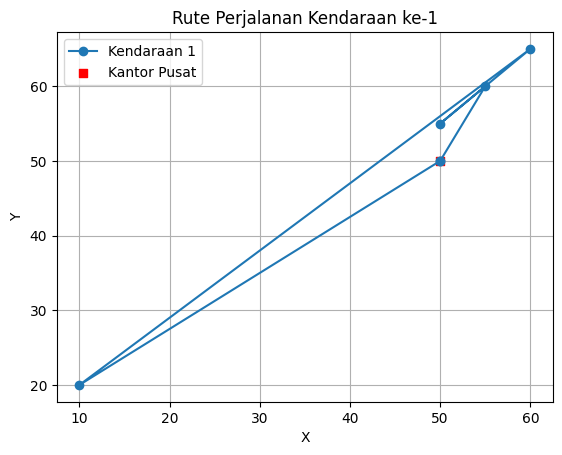

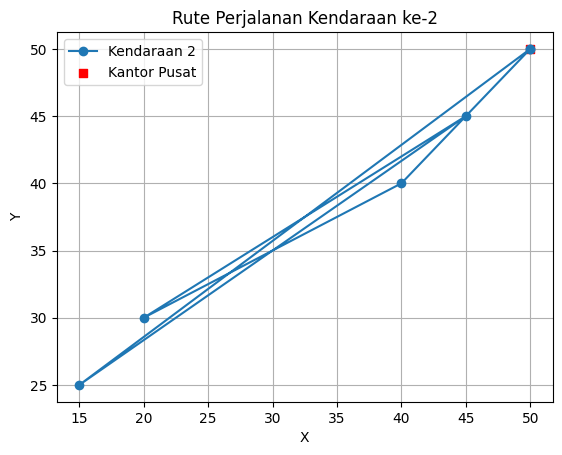

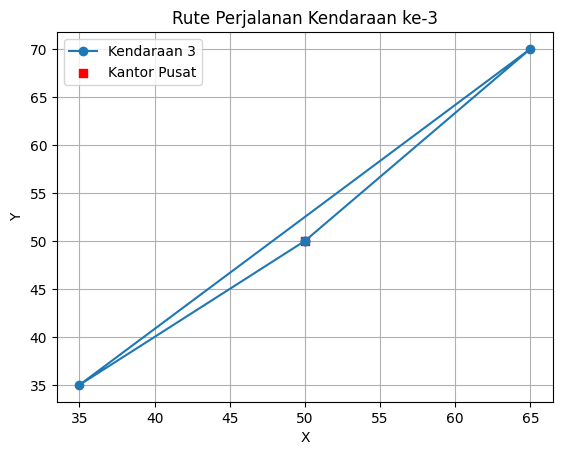

In [22]:
route_coords = [[] for _ in range(jumlahKendaraan)]
for i in range(jumlahKendaraan):
        # mulai dari kantor pusat
        route_coords[i].append(kantorPusat)
        for cid in bestRoutes[i]:
            cust = cariPelanggan(cid, arrCust)
            coor = (cust[1], cust[2])
            route_coords[i].append(coor)
        # kembali ke pusat
        route_coords[i].append(kantorPusat)

for i, route in enumerate(route_coords):
        plt.figure()
        x, y = zip(*route)
        plt.plot(x, y, marker='o', label=f'Kendaraan {i+1}')
        plt.scatter(kantorPusat[0], kantorPusat[1], c='red', marker='s', label='Kantor Pusat')
        plt.title(f'Rute Perjalanan Kendaraan ke-{i+1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.show()

contoh *output*

**rute kendaraan 1**

<img src="./asset/Kendaraan_1.png" alt="Rute Kendaraan 1" style="width: 50%; height: auto;">

**rute kendaraan 2**

<img src="./asset/Kendaraan_2.png" alt="Rute Kendaraan 2" style="width: 50%; height: auto;">

**rute kendaraan 3**

<img src="./asset/Kendaraan_3.png" alt="Rute Kendaraan 3" style="width: 50%; height: auto;">
